# --- ***Pneumonia Classification*** ---

Download Dataset:

In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

# print("Path to dataset files:", path)

In [2]:
# !mv /root/.cache/kagglehub/datasets/paultimothymooney/ /content/drive/MyDrive/Datasets

Import preprocess libraries & img tools:

In [3]:
import os, shutil

import matplotlib.pyplot as plt
from PIL import ImageOps, Image
import cv2

import pandas as pd
import numpy as np

import skimage
import skimage.segmentation
import seaborn as sns

Constants:

In [4]:
DATA_DIR = '/content/drive/MyDrive/Datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray'
TRAIN_PATH = os.path.join(DATA_DIR, 'train')
VAL_PATH = os.path.join(DATA_DIR, 'val')
TEST_PATH = os.path.join(DATA_DIR, 'test')

MODEL_PATH = "/content/drive/MyDrive/Models/Pneumonia_Classifaier"

In [63]:
labels: list = ['NORMAL', 'PNEUMONIA']
W, H = 128, 128
img_size = (W, H)
random_state = 42
batch_size = 64

## Data

Load & Preprocess Data (for analysis):

In [6]:
def image_preprocessor(img):
    # resize
    img_resized = cv2.resize(img, (W, H), interpolation=cv2.INTER_LANCZOS4)

    # normalize
    normalized_img = img_resized.astype(np.float32) / 255.0

    return normalized_img


In [7]:
def load_data(data_dir):
    X = []
    y = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                img_arr = image_preprocessor(
                    cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                  )

                if img_arr is None:
                    print(f"Warning: {img_path} could not be read. Skipping...")
                    continue

                X.append(img_arr)
                y.append(class_num)

            except Exception as e:
                print(f"Error processing {img}: {e}")

    return np.array(X), np.array(y)


In [8]:
from sklearn.utils import shuffle

In [9]:
# train_imgs, train_lables = shuffle(*load_data(TRAIN_PATH), random_state=random_state)
# val_imgs, val_lables = shuffle(*load_data(VAL_PATH), random_state=random_state)
test_imgs, test_labels = shuffle(*load_data(TEST_PATH), random_state=random_state)

In [10]:
test_labels

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,

### Data Analysis:

In [11]:
def show_data_samples(data, labels):
    num_samples = min(len(data), 9)

    plt.figure(figsize=(20, 10))

    for i in range(num_samples):
        plt.subplot(3, 3, i+1)
        plt.imshow(data[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')


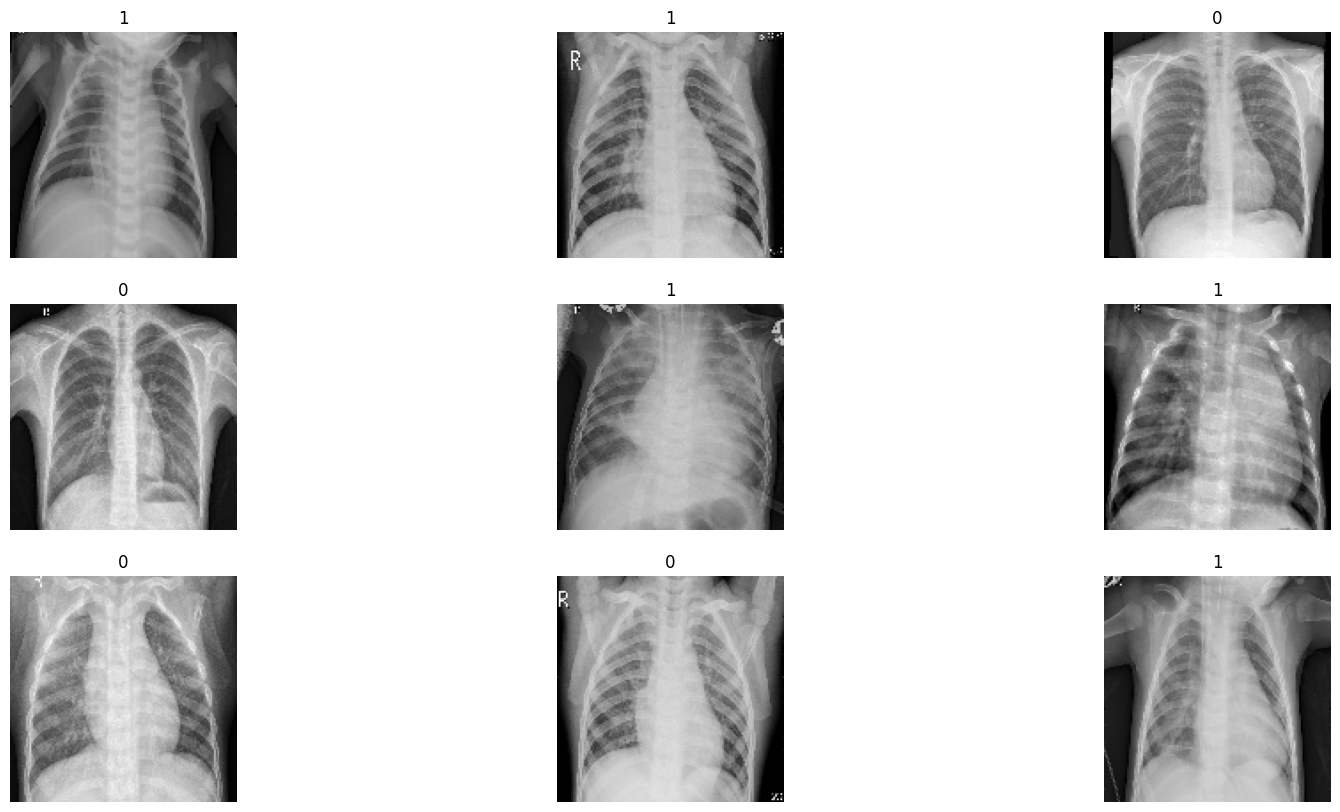

In [12]:
show_data_samples(test_imgs, test_labels)

In [13]:
print(
    # train_imgs.shape,
    # val_imgs.shape,
    test_imgs.shape,
)

(624, 128, 128)


In [14]:
# check_labels = train_labels.copy().astype(str)
# check_labels[check_labels == '0'] = labels[0]
# check_labels[check_labels == '1'] = labels[1]

# sns.countplot(x=check_labels, palette='Set2')
# plt.title("Train data Distribution")
# plt.show()

In [15]:
# check_labels = val_labels.copy().astype(str)
# check_labels[check_labels == '0'] = labels[0]
# check_labels[check_labels == '1'] = labels[1]

# sns.countplot(x=check_labels, palette='Set2')
# plt.title("Val data Distribution")
# plt.show()

<ipython-input-16-f5a0a53b307e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=check_labels, palette='Set2')


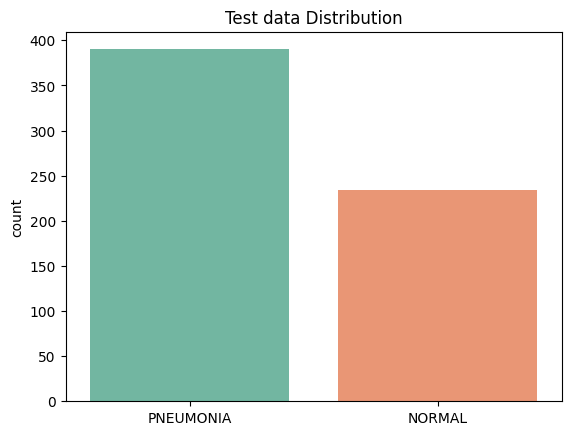

In [16]:
check_labels = test_labels.copy().astype(str)
check_labels[check_labels == '0'] = labels[0]
check_labels[check_labels == '1'] = labels[1]

sns.countplot(x=check_labels, palette='Set2')
plt.title("Test data Distribution")
plt.show()

### ------------------------------------------------------------

Import Model Libraries & Tools:

In [66]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg19 import VGG19

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dropout
from tensorflow.keras import regularizers

from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


### Load Data:

Data Augmentation:

In [18]:
datagen = ImageDataGenerator(
                rescale=1. / 255,
                rotation_range=15, # [with limit changes]
                width_shift_range=0.1, # [with limit changes]
                height_shift_range=0.1, # [with limit changes]
                zoom_range=0.1, # [with limit changes]
                shear_range=0.1, # [with limit changes]
                brightness_range=[0.8, 1.2], # [with limit changes]
                fill_mode='nearest', # fills with nearest pixels

                horizontal_flip=False, # Don't use this for heart or lungs imgs
                vertical_flip=False, # don't use this for medical imgs NEVER!
                channel_shift_range=0, # DON'T use this for medical imgs (keep it 1 channal imgs)
            )

vt_datagen = ImageDataGenerator(rescale=1. / 255)


Load & Preprocess data as datagen: (recommended for train the model)

In [64]:
train_data = datagen.flow_from_directory(
                                        TRAIN_PATH,
                                        batch_size=batch_size,
                                        target_size=img_size,
                                        color_mode='rgb',
                                        class_mode='categorical',
                                        shuffle=True,
                                        seed=random_state,
                                    )

val_data = vt_datagen.flow_from_directory(
                                        VAL_PATH,
                                        batch_size=batch_size,
                                        target_size=img_size,
                                        color_mode='rgb',
                                        class_mode='categorical',
                                        shuffle=True,
                                        seed=random_state,
                                    )

test_data = vt_datagen.flow_from_directory(
                                        TEST_PATH,
                                        batch_size=batch_size,
                                        target_size=img_size,
                                        color_mode='rgb',
                                        class_mode='categorical',
                                        shuffle=True,
                                        seed=random_state,
                                    )

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [65]:
labels: dict = (train_data.class_indices)
labels = dict((v, k) for k, v in labels.items()) # displacement key, value
labels

{0: 'NORMAL', 1: 'PNEUMONIA'}

## Model

Transfer Learning:

In [21]:
# VGG19
base_model = VGG19(input_shape=(W, H, 3), include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False


80134624/80134624 [==============================] - 0s 0us/step


In [67]:
def model_builder(base_model):
    x_input = Flatten()(base_model.output)

    x1 = Dense(4608, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x_input)
    x1 = Dropout(0.5)(x1)

    x2 = Dense(1152, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x2 = Dropout(0.5)(x2)

    output = Dense(2, activation='sigmoid')(x2)

    model = Model(inputs=base_model.inputs, outputs=output)

    return model

model_builder(base_model).summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0  

Callbacks:

In [68]:
es = EarlyStopping(
    monitor="val_loss", patience=1,
    restore_best_weights=True,
    mode="auto", verbose=1)

cp = ModelCheckpoint(
    MODEL_PATH,
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    save_freq="epoch",
    verbose=1, mode="auto")

lrr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5, patience=1,
    min_lr=1e-6,
    verbose=1, mode="auto")


## Training & Testing

In [41]:
from tensorflow.keras.metrics import Recall, Precision

### train base_model + DenseNN with **SGD** opt:

In [69]:
model_sgd_opt = model_builder(base_model)
model_sgd_opt.compile(
    loss='binary_crossentropy',
    optimizer=SGD(learning_rate=1e-4, weight_decay=1e-6, momentum=0, nesterov=True),
    metrics=['accuracy', Precision(), Recall()]
)

In [70]:
sgd_history = model_sgd_opt.fit(
    train_data,
    steps_per_epoch=50,
    epochs=5,
    callbacks=[es, cp, lrr],
    validation_data=val_data
)

Epoch 1/5
50/50 [==============================] - ETA: 0s - loss: 78.1595 - accuracy: 0.4784 - precision_4: 0.4850 - recall_6: 0.5169
Epoch 1: val_loss improved from inf to 78.09393, saving model to /content/drive/MyDrive/Models/Pneumonia_Classifaier
50/50 [==============================] - 72s 1s/step - loss: 78.1595 - accuracy: 0.4784 - precision_4: 0.4850 - recall_6: 0.5169 - val_loss: 78.0939 - val_accuracy: 0.6250 - val_precision_4: 0.5238 - val_recall_6: 0.6875 - lr: 1.0000e-04
Epoch 2/5
50/50 [==============================] - ETA: 0s - loss: 78.0393 - accuracy: 0.6700 - precision_4: 0.6238 - recall_6: 0.6481
Epoch 2: val_loss improved from 78.09393 to 78.05808, saving model to /content/drive/MyDrive/Models/Pneumonia_Classifaier
50/50 [==============================] - 71s 1s/step - loss: 78.0393 - accuracy: 0.6700 - precision_4: 0.6238 - recall_6: 0.6481 - val_loss: 78.0581 - val_accuracy: 0.5625 - val_precision_4: 0.6000 - val_recall_6: 0.5625 - lr: 1.0000e-04
Epoch 3/5
50/50

test model:

In [71]:
sgd_test_result = model_sgd_opt.evaluate(test_data)

10/10 [==============================] - 8s 803ms/step - loss: 77.8698 - accuracy: 0.6282 - precision_4: 0.6399 - recall_6: 0.6266


trained model analysis: (visualize)

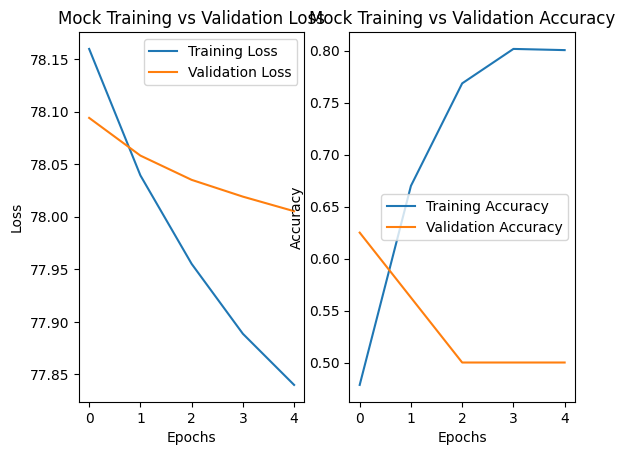

In [72]:
# Loss:
plt.subplot(1, 2, 1)
plt.plot(sgd_history.history['loss'], label='Training Loss')
plt.plot(sgd_history.history['val_loss'], label='Validation Loss')
plt.title('Mock Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy:
plt.subplot(1, 2, 2)
plt.plot(sgd_history.history['accuracy'], label='Training Accuracy')
plt.plot(sgd_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Mock Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

save model:

In [74]:
if not os.path.isdir(MODEL_PATH):
    os.mkdir(MODEL_PATH)

MODEL_001_PATH = os.path.join(MODEL_PATH, 'model_001.keras')
model_sgd_opt.save(
    filepath=MODEL_001_PATH,
    overwrite=True
)

### train last model with **RMSprop** opt:

In [75]:
model_rmsprop_opt = model_builder(base_model)
model_rmsprop_opt.load_weights(MODEL_001_PATH)

set_trainable = False
for layer in base_model.layers:
    # unfreeze 2 last layers for learn our high features task! :3
    if layer.name in ['block5_conv3', 'block5_conv4']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model_rmsprop_opt.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4, momentum=0),
    metrics=['accuracy', Precision(), Recall()]
)

In [76]:
rmsprop_history = model_rmsprop_opt.fit(
    train_data,
    steps_per_epoch=50,
    epochs=5,
    callbacks=[es, cp, lrr],
    validation_data=val_data
)

Epoch 1/5
50/50 [==============================] - ETA: 0s - loss: 62.4729 - accuracy: 0.9429 - precision_5: 0.9440 - recall_7: 0.9422
Epoch 1: val_loss improved from 78.00520 to 49.67197, saving model to /content/drive/MyDrive/Models/Pneumonia_Classifaier
50/50 [==============================] - 69s 1s/step - loss: 62.4729 - accuracy: 0.9429 - precision_5: 0.9440 - recall_7: 0.9422 - val_loss: 49.6720 - val_accuracy: 0.8750 - val_precision_5: 0.8750 - val_recall_7: 0.8750 - lr: 1.0000e-04
Epoch 2/5
50/50 [==============================] - ETA: 0s - loss: 39.9253 - accuracy: 0.9659 - precision_5: 0.9656 - recall_7: 0.9644
Epoch 2: val_loss improved from 49.67197 to 31.52864, saving model to /content/drive/MyDrive/Models/Pneumonia_Classifaier
50/50 [==============================] - 71s 1s/step - loss: 39.9253 - accuracy: 0.9659 - precision_5: 0.9656 - recall_7: 0.9644 - val_loss: 31.5286 - val_accuracy: 0.8125 - val_precision_5: 0.8125 - val_recall_7: 0.8125 - lr: 1.0000e-04
Epoch 3/5


test model:

In [77]:
rmsprop_test_result = model_rmsprop_opt.evaluate(test_data)

10/10 [==============================] - 8s 800ms/step - loss: 6.8062 - accuracy: 0.9087 - precision_5: 0.9087 - recall_7: 0.9087


trained model analysis: (visualize)

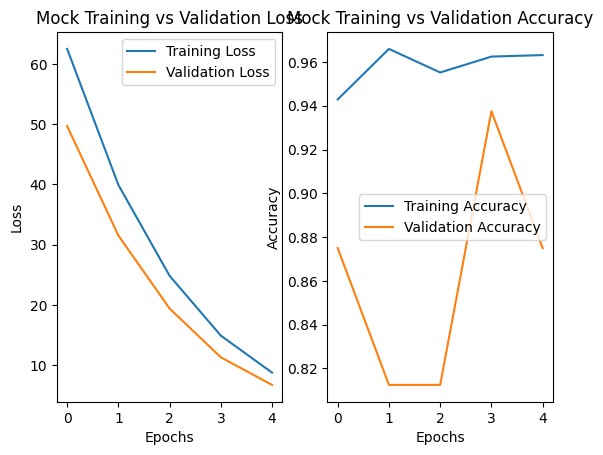

In [78]:
# Loss:
plt.subplot(1, 2, 1)
plt.plot(rmsprop_history.history['loss'], label='Training Loss')
plt.plot(rmsprop_history.history['val_loss'], label='Validation Loss')
plt.title('Mock Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy:
plt.subplot(1, 2, 2)
plt.plot(rmsprop_history.history['accuracy'], label='Training Accuracy')
plt.plot(rmsprop_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Mock Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

save model:

In [80]:
MODEL_002_PATH = os.path.join(MODEL_PATH, 'model_002.keras')
model_rmsprop_opt.save(
    filepath=MODEL_002_PATH,
    overwrite=True
)

### train last model with **Adam** opt:

In [81]:
model_adam_opt = model_builder(base_model)
model_adam_opt.load_weights(MODEL_002_PATH)

model_adam_opt.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy', Precision(), Recall()]
)

In [82]:
adam_history = model_adam_opt.fit(
    train_data,
    steps_per_epoch=50,
    epochs=5,
    callbacks=[es, cp, lrr],
    validation_data=val_data
)

Epoch 1/5
50/50 [==============================] - ETA: 0s - loss: 3.0408 - accuracy: 0.9669 - precision_6: 0.9662 - recall_8: 0.9665
Epoch 1: val_loss improved from 6.76532 to 1.34941, saving model to /content/drive/MyDrive/Models/Pneumonia_Classifaier
50/50 [==============================] - 70s 1s/step - loss: 3.0408 - accuracy: 0.9669 - precision_6: 0.9662 - recall_8: 0.9665 - val_loss: 1.3494 - val_accuracy: 0.8750 - val_precision_6: 0.8750 - val_recall_8: 0.8750 - lr: 1.0000e-04
Epoch 2/5
50/50 [==============================] - ETA: 0s - loss: 0.7283 - accuracy: 0.9716 - precision_6: 0.9712 - recall_8: 0.9706Restoring model weights from the end of the best epoch: 1.

Epoch 2: val_loss did not improve from 1.34941

Epoch 2: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
50/50 [==============================] - 70s 1s/step - loss: 0.7283 - accuracy: 0.9716 - precision_6: 0.9712 - recall_8: 0.9706 - val_loss: 1.3769 - val_accuracy: 0.6875 - val_precision_6: 0.68

test model:

In [83]:
adam_test_result = model_adam_opt.evaluate(test_data)

10/10 [==============================] - 8s 807ms/step - loss: 1.4200 - accuracy: 0.8990 - precision_6: 0.8989 - recall_8: 0.8974


trained model analysis: (visualize)

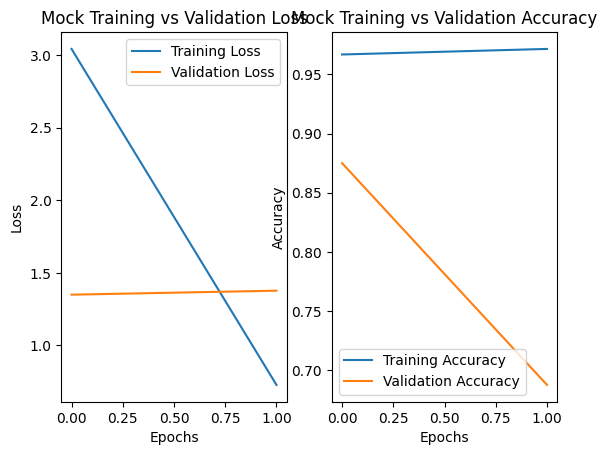

In [84]:
# Loss:
plt.subplot(1, 2, 1)
plt.plot(adam_history.history['loss'], label='Training Loss')
plt.plot(adam_history.history['val_loss'], label='Validation Loss')
plt.title('Mock Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy:
plt.subplot(1, 2, 2)
plt.plot(adam_history.history['accuracy'], label='Training Accuracy')
plt.plot(adam_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Mock Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

save model:

In [85]:
MODEL_003_PATH = os.path.join(MODEL_PATH, 'model_003.keras')
model_adam_opt.save(
    filepath=MODEL_003_PATH,
    overwrite=True
)

# The End...

trained model analysis: (visualize)

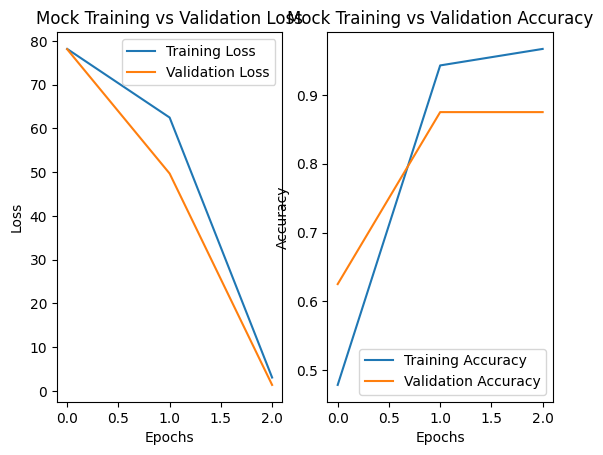

In [86]:
history = {
    'loss': [
        sgd_history.history['loss'][0],
        rmsprop_history.history['loss'][0],
        adam_history.history['loss'][0],
    ],
    'accuracy': [
        sgd_history.history['accuracy'][0],
        rmsprop_history.history['accuracy'][0],
        adam_history.history['accuracy'][0],
    ],
    'val_loss': [
        sgd_history.history['val_loss'][0],
        rmsprop_history.history['val_loss'][0],
        adam_history.history['val_loss'][0],
    ],
    'val_accuracy': [
        sgd_history.history['val_accuracy'][0],
        rmsprop_history.history['val_accuracy'][0],
        adam_history.history['val_accuracy'][0],
    ]
}

# Loss:
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Mock Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy:
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Mock Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


calc F1-Score metric:

In [95]:
from sklearn.metrics import f1_score


for epoch in range(5):
    all_true = []
    all_pred = []

    for i, (x_batch, y_batch) in enumerate(val_data):
        if i >= 10:
            break

        y_pred = model_adam_opt.predict(x_batch)

        print(f"Batch {i+1}:")
        print(f"True labels: {np.argmax(y_batch, axis=-1)[:5]}")
        print(f"Predictions: {np.argmax(y_pred, axis=-1)[:5]}")

        all_true.extend(np.argmax(y_batch, axis=-1))
        all_pred.extend(np.argmax(y_pred, axis=-1))

    if len(all_true) == 0 or len(all_pred) == 0:
        print(f"Warning: empty true or predicted labels for epoch {epoch+1}")
        continue

    print(f"Total true labels collected: {len(all_true)}")
    print(f"Total predicted labels collected: {len(all_pred)}")

    f1 = f1_score(np.array(all_true), np.array(all_pred), average='weighted')
    print(f"Epoch {epoch+1}: F1 Score = {f1}")


1/1 [==============================] - 0s 206ms/step
Batch 1:
True labels: [1 0 0 1 1]
Predictions: [1 1 0 1 1]
1/1 [==============================] - 0s 201ms/step
Batch 2:
True labels: [1 1 0 0 0]
Predictions: [1 1 1 0 0]
1/1 [==============================] - 0s 198ms/step
Batch 3:
True labels: [0 1 1 1 0]
Predictions: [1 1 1 1 0]
1/1 [==============================] - 0s 199ms/step
Batch 4:
True labels: [1 0 1 1 0]
Predictions: [1 0 1 1 0]
1/1 [==============================] - 0s 205ms/step
Batch 5:
True labels: [1 0 0 1 1]
Predictions: [1 0 0 1 1]
1/1 [==============================] - 0s 172ms/step
Batch 6:
True labels: [0 1 1 0 1]
Predictions: [0 1 1 1 1]
1/1 [==============================] - 0s 196ms/step
Batch 7:
True labels: [0 1 1 1 0]
Predictions: [0 1 1 1 0]
1/1 [==============================] - 0s 167ms/step
Batch 8:
True labels: [0 1 0 1 1]
Predictions: [0 1 1 1 1]
1/1 [==============================] - 0s 199ms/step
Batch 9:
True labels: [0 0 1 1 1]
Predictions: [0 1

Last Talk:

In [96]:
from IPython.core.display import HTML
display(HTML('<h1 style="color:Tomato; font-size:50px;">Thank you for reading my code :D</h1>'))
